In [39]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
train = pd.read_csv('train_E6oV3lV.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train.iloc[0]['tweet']

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

# missed data

In [5]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

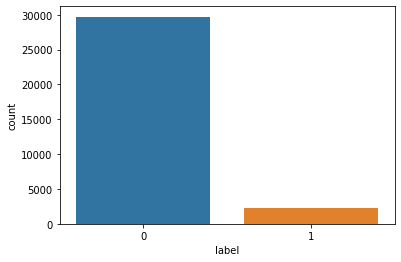

In [7]:
sns.countplot(train['label'])

In [8]:
def remove_hashtag(l):
    for x in range(len(l)):
        l[x] = re.sub(r'#','',l[x])
    return l


In [9]:
train['mention'] = train['tweet'].apply(lambda x: re.findall(r'@\w+',x))
train['hashtag'] = train['tweet'].apply(lambda x: re.findall(r'#\w+',x))
train['hashtag'] = train['hashtag'].apply(lambda x: remove_hashtag(x))
train['tweet'] = train['tweet'].apply(lambda x: re.sub(r'@\w+|#','',x))

In [10]:
print(train['hashtag'].iloc[0])

['run']


In [11]:
train.head()

,id,label,tweet,mention,hashtag
0,1,0,when a father is dysfunctional and is so sel...,[@user],[run]
1,2,0,thanks for lyft credit i can't use cause the...,"[@user, @user]","[lyft, disapointed, getthanked]"
2,3,0,bihday your majesty,[],[]
3,4,0,model i love u take with u all the time in u...,[],[model]
4,5,0,factsguide: society now motivation,[],[motivation]


In [12]:
hashtags = []
for x in train['hashtag']:
    for y in x:
        hashtags.append(y)

In [13]:
len(hashtags)

76296

In [14]:
len(np.unique(np.array(hashtags)))

24083

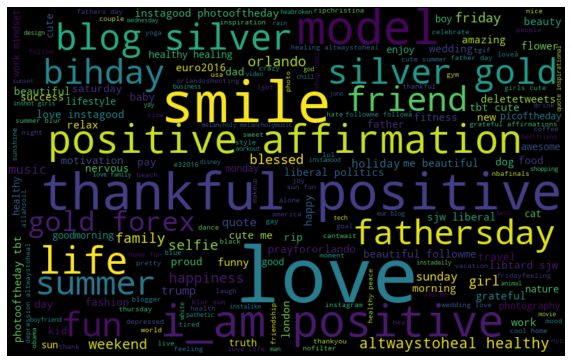

In [15]:
all_hashtags = ' '.join([text for text in hashtags])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_hashtags)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
#remove punctuate
train['tweet'] = train['tweet'].str.replace("[^a-zA-Z#]", " ")

In [17]:
train['tweet'] = train['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [18]:
train['tweet'][1]

'thanks for lyft credit can use cause they don offer wheelchair vans pdx disapointed getthanked'

In [19]:
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

In [20]:
tokenized_tweet

0        [when, father, dysfunctional, and, selfish, dr...
1        [thanks, for, lyft, credit, can, use, cause, t...
2                                  [bihday, your, majesty]
3                [model, love, take, with, all, the, time]
4                   [factsguide, society, now, motivation]
                               ...                        
31957                              [ate, isz, that, youuu]
31958    [see, nina, turner, the, airwaves, trying, wra...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [sikh, temple, vandalised, calgary, wso, conde...
31961                       [thank, you, for, you, follow]
Name: tweet, Length: 31962, dtype: object

In [21]:
stemmer = PorterStemmer()
train['tweet'] = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

train['tweet']

0        [when, father, dysfunct, and, selfish, drag, h...
1        [thank, for, lyft, credit, can, use, caus, the...
2                                  [bihday, your, majesti]
3                [model, love, take, with, all, the, time]
4                         [factsguid, societi, now, motiv]
                               ...                        
31957                              [ate, isz, that, youuu]
31958    [see, nina, turner, the, airwav, tri, wrap, he...
31959    [listen, sad, song, monday, morn, otw, work, sad]
31960    [sikh, templ, vandalis, calgari, wso, condemn,...
31961                       [thank, you, for, you, follow]
Name: tweet, Length: 31962, dtype: object

In [22]:
hashtags_0 = []
for x in train[train['label'] == 0]['hashtag']:
    for y in x:
        hashtags_0.append(y)

In [23]:
hashtags_1 = []
for x in train[train['label'] == 1]['hashtag']:
    for y in x:
        hashtags_1.append(y)

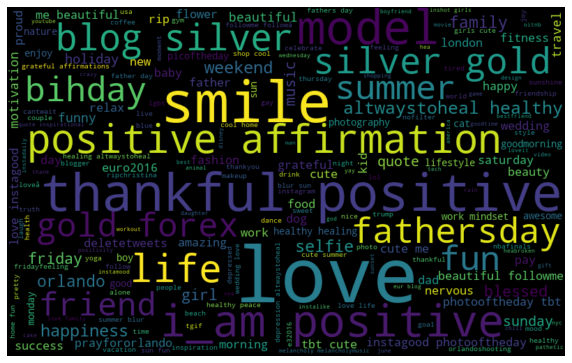

In [24]:
#label 0 
all_hashtags_0 = ' '.join([text for text in hashtags_0])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_hashtags_0)


plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

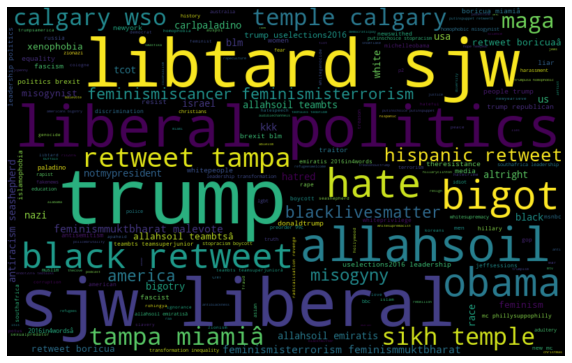

In [25]:
#label 1
all_hashtags_1 = ' '.join([text for text in hashtags_1])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_hashtags_1)


plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

train['tweet'] = tokenized_tweet

In [27]:
train['tweet']

0        when father dysfunctional and selfish drags hi...
1        thanks for lyft credit can use cause they don ...
2                                      bihday your majesty
3                        model love take with all the time
4                        factsguide society now motivation
                               ...                        
31957                                   ate isz that youuu
31958    see nina turner the airwaves trying wrap herse...
31959      listening sad songs monday morning otw work sad
31960      sikh temple vandalised calgary wso condemns act
31961                             thank you for you follow
Name: tweet, Length: 31962, dtype: object

In [28]:
train['tweet'].shape

(31962,)

In [29]:

lrg_p_clf = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),
                  ('lrg_p',LogisticRegression()),])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train['tweet'], train['label'], test_size=0.33, random_state=42)

In [32]:
X_train.shape

(21414,)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lrg_p_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lrg_p',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_

In [35]:
predictions = lrg_p_clf.predict(X_test)

In [36]:
print(confusion_matrix(y_test,predictions))

[[9782   24]
 [ 538  204]]


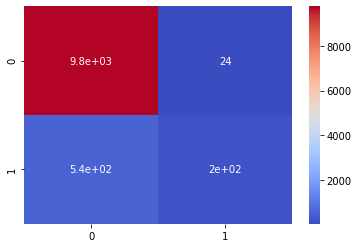

In [37]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap='coolwarm')

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9806
           1       0.89      0.27      0.42       742

    accuracy                           0.95     10548
   macro avg       0.92      0.64      0.70     10548
weighted avg       0.94      0.95      0.93     10548



In [40]:
text_clf_LSVC = Pipeline([('tfidf',TfidfVectorizer(stop_words = 'english')),
                         ('lsvc',LinearSVC())])

In [42]:
text_clf_LSVC.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
         

In [43]:
prediction_LSVC = text_clf_LSVC.predict(X_test)

In [44]:
print(confusion_matrix(y_test,prediction_LSVC))

[[9735   71]
 [ 327  415]]


In [45]:
print(classification_report(y_test,prediction_LSVC))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9806
           1       0.85      0.56      0.68       742

    accuracy                           0.96     10548
   macro avg       0.91      0.78      0.83     10548
weighted avg       0.96      0.96      0.96     10548

